<a href="https://colab.research.google.com/github/syedsauda/CE888/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kagle downloading datasets

In [13]:
import os

os.environ['KAGGLE_USERNAME'] = "syedsaud" # username from the json file
os.environ['KAGGLE_KEY'] = "94b7de5f3cf3cb489eb1ec0d36f07ab6" # key from the json file

!kaggle competitions download -c santander-customer-transaction-prediction #DATASET 1
!kaggle competitions download -c microsoft-malware-prediction              #DATASET 2

  0% 0.00/462k [00:00<?, ?B/s]
100% 462k/462k [00:00<00:00, 70.6MB/s]
 88% 110M/125M [00:00<00:00, 146MB/s] 
100% 125M/125M [00:00<00:00, 231MB/s]
 91% 114M/125M [00:00<00:00, 130MB/s] 
100% 125M/125M [00:00<00:00, 151MB/s]
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)




---


Removing unnecessary files and renaming datasets

---



In [12]:
!rm sample_submission.csv.zip
!rename 's/test.csv.zip/data2_test.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/data2_train.csv.zip/' train.csv.zip
!ls

data1_test.csv.zip   data2_test.csv.zip
data1_train.csv.zip  data2_train.csv.zip


#Loading datasets into pandas 

In [17]:
import pandas as pd
data1_train = pd.read_csv('data1_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
data1_test = pd.read_csv('data1_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

data2_train = pd.read_csv('data2_train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
data2_test = pd.read_csv('data2_test.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---
First Dataset


---



In [18]:
print(data1_train)
print(data1_test)

             ID_code  target    var_0  ...  var_197  var_198  var_199
0            train_0       0   8.9255  ...   8.5635  12.7803  -1.0914
1            train_1       0  11.5006  ...   8.7889  18.3560   1.9518
2            train_2       0   8.6093  ...   8.2675  14.7222   0.3965
3            train_3       0  11.0604  ...  10.2922  17.9697  -8.9996
4            train_4       0   9.8369  ...   9.5031  17.9974  -8.8104
...              ...     ...      ...  ...      ...      ...      ...
199995  train_199995       0  11.4880  ...   8.5326  16.6660 -17.8661
199996  train_199996       0   4.9149  ...   6.7419  15.9054   0.3388
199997  train_199997       0  11.2232  ...   8.7155  13.8329   4.1995
199998  train_199998       0   9.7148  ...  10.0342  15.5289 -13.9001
199999  train_199999       0  10.8762  ...   8.1857  12.1284   0.1385

[200000 rows x 202 columns]
            ID_code    var_0    var_1  ...  var_197  var_198  var_199
0            test_0  11.0656   7.7798  ...  10.7200  15.4722 

---
Second Dataset


---



In [0]:
print(data2_train)
print(data2_test)

#Inspecting Dataset1

Histogram of train dataset on 'var_0'


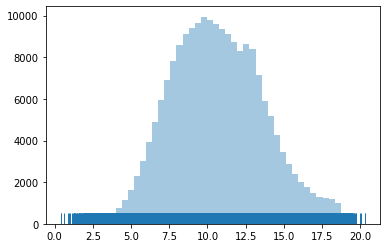

In [22]:
import seaborn as sns

y_df1 = data1_train[["var_0"]].
y = y_df1.values.T[0]
print("Histogram of train dataset on 'var_0'")
sns_plot = sns.distplot(y, kde=False, rug=True)

Histogram of test dataset on 'var_0'


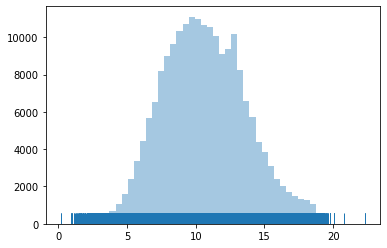

In [23]:
y_df2 = data1_test[["var_0"]]
y = y_df2.values.T[0]
print("Histogram of test dataset on 'var_0'")
sns_plot = sns.distplot(y, kde=False, rug=True)

#Inspecting Dataset2

Histogram of train dataset on 'Census_OEMModelIdentifier'


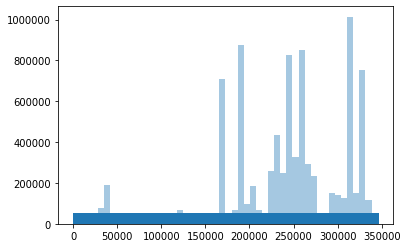

In [33]:
y_df3 = data2_train[["Census_OEMModelIdentifier"]]
y = y_df3.values.T[0]
print("Histogram of train dataset on 'Census_OEMModelIdentifier'")
sns_plot = sns.distplot(y, kde=False, rug=True)

Histogram of test dataset on 'Census_OEMModelIdentifier'


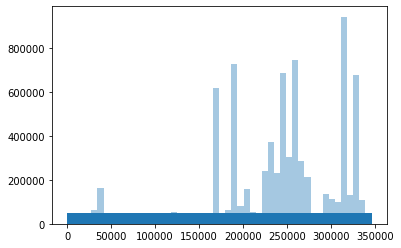

In [34]:
y_df4 = data2_test[["Census_OEMModelIdentifier"]]
y = y_df4.values.T[0]
print("Histogram of test dataset on 'Census_OEMModelIdentifier'")
sns_plot = sns.distplot(y, kde=False, rug=True)